In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from prophet import Prophet

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
diario = pd.read_csv('diario_inter.csv')
diario['pickup_datetime'] = pd.to_datetime(diario['pickup_datetime'])
diario.set_index('pickup_datetime', inplace=True)

# Diario

In [5]:
diario

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-05,99802,125552.34,1540935.85,8.975522e+05,78924.0
2023-09-06,114485,141650.92,1844221.48,1.124817e+06,91117.0
2023-09-07,126533,156753.91,2059376.29,1.273202e+06,100287.0
2023-09-08,124365,148088.32,1943639.53,1.199228e+06,95452.0
2023-09-09,126584,147491.51,1787366.36,1.107545e+06,90972.0
...,...,...,...,...,...
2024-08-27,91633,120296.62,1418567.88,8.241690e+05,73266.0
2024-08-28,101202,130843.35,1570150.82,9.204025e+05,81088.0
2024-08-29,96395,124708.58,1498053.45,8.947159e+05,76483.0


In [6]:
diario_p = diario['n_trips']

In [7]:
diario_p

,n_trips
pickup_datetime,
2023-09-05,78924.0
2023-09-06,91117.0
2023-09-07,100287.0
2023-09-08,95452.0
2023-09-09,90972.0
...,...
2024-08-27,73266.0
2024-08-28,81088.0
2024-08-29,76483.0


In [8]:
diario_p = diario_p.reset_index()

In [9]:
diario_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
diario_p

,ds,y
0,2023-09-05,78924.0
1,2023-09-06,91117.0
2,2023-09-07,100287.0
3,2023-09-08,95452.0
4,2023-09-09,90972.0
...,...,...
357,2024-08-27,73266.0
358,2024-08-28,81088.0
359,2024-08-29,76483.0
360,2024-08-30,70549.0


## Modelo 1

In [11]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, uncertainty_samples = 20, mcmc_samples=20, interval_width= 0.5)

# Entrenamos el modelo
prophet_1.fit(diario_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 365 dias.
build_forecast = prophet_1.make_future_dataframe(periods=365, freq='D') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/1yzbpw4x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/_mwn3ok9.json
21:39:33 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=87595', 'data', 'file=/tmp/tmp8ke_jo2c/1yzbpw4x.json', 'init=/tmp/tmp8ke_jo2c/_mwn3ok9.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model2qz7yc8w/prophet_model-20241113213933_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=87595', 'data', 'file=/tmp/tmp8ke_jo2c/1yzbpw4x.json', 'init=/tmp/tmp8ke_jo2c/_mwn3ok9.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model2qz7yc8w/prophet_model-20241113213933_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

21:39:34 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=87595', 'data', 'file=/tmp/tmp8ke_jo2c/1yzbpw4x.json', 'init=/tmp/tmp8ke_jo2c/_mwn3ok9.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model2qz7yc8w/prophet_model-20241113213933_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8ke_jo2c/prophet_model2qz7yc8w/prophet_model-20241113213933_1.csv
 console_msgs (if any):
	/tmp/tmp8ke_jo2c/prophet_model2qz7yc8w/prophet_model-20241113213933_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [12]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-05,97864.883765,84377.927673,94776.556401,94278.915028,102777.029699,-7360.187371,-9036.594514,-3990.993361,1387.134143,358.609006,2316.675189,-8747.321513,-11153.123018,-4643.256331,0.0,0.0,0.0,90504.696394
1,2023-09-06,97797.781558,86727.119793,100808.240722,94201.077703,102727.540377,-4563.282228,-6438.402000,404.240493,4955.253126,4356.378601,5475.768844,-9518.535354,-10978.193836,-4346.001097,0.0,0.0,0.0,93234.499331
2,2023-09-07,97730.679351,89098.399644,103599.000512,94123.240379,102678.051054,-1888.736522,-3458.739502,3053.990078,8397.556501,7890.084290,8955.427884,-10286.293022,-11843.736798,-4881.122624,0.0,0.0,0.0,95841.942829
3,2023-09-08,97663.577144,79913.755849,93843.351300,94045.403054,102628.561732,-7081.671207,-10486.292525,-1709.748884,3954.496609,3662.422597,4165.930515,-11036.167815,-13342.022671,-5858.869490,0.0,0.0,0.0,90581.905937
4,2023-09-09,97596.474936,86162.156686,98915.787445,93967.565730,102579.072410,-6372.094130,-9268.283462,-1110.869322,5381.929527,5153.698533,5897.212092,-11754.023656,-14754.567021,-6868.629498,0.0,0.0,0.0,91224.380806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2025-08-27,43709.763405,13729.911928,80169.604555,831.505545,85125.990041,1180.967035,-8446.472660,8407.588862,4955.253126,4356.378601,5475.768844,-3774.286092,-13261.218235,3715.524039,0.0,0.0,0.0,44890.730440
723,2025-08-28,43628.967462,16288.342771,84967.241465,573.069837,85098.506591,4274.823656,-4924.264511,12091.684668,8397.556501,7890.084290,8955.427884,-4122.732844,-13733.825589,3244.737794,0.0,0.0,0.0,47903.791119
724,2025-08-29,43548.171519,7491.137558,77235.046720,314.634129,85078.109523,-589.520353,-9231.169744,6786.258875,3954.496609,3662.422597,4165.930515,-4544.016962,-13397.100260,2971.984732,0.0,0.0,0.0,42958.651167
725,2025-08-30,43467.375577,9881.037231,71535.109768,56.198421,85057.712456,344.973468,-8879.708103,7942.931301,5381.929527,5153.698533,5897.212092,-5036.956059,-12900.203648,2616.972286,0.0,0.0,0.0,43812.349045


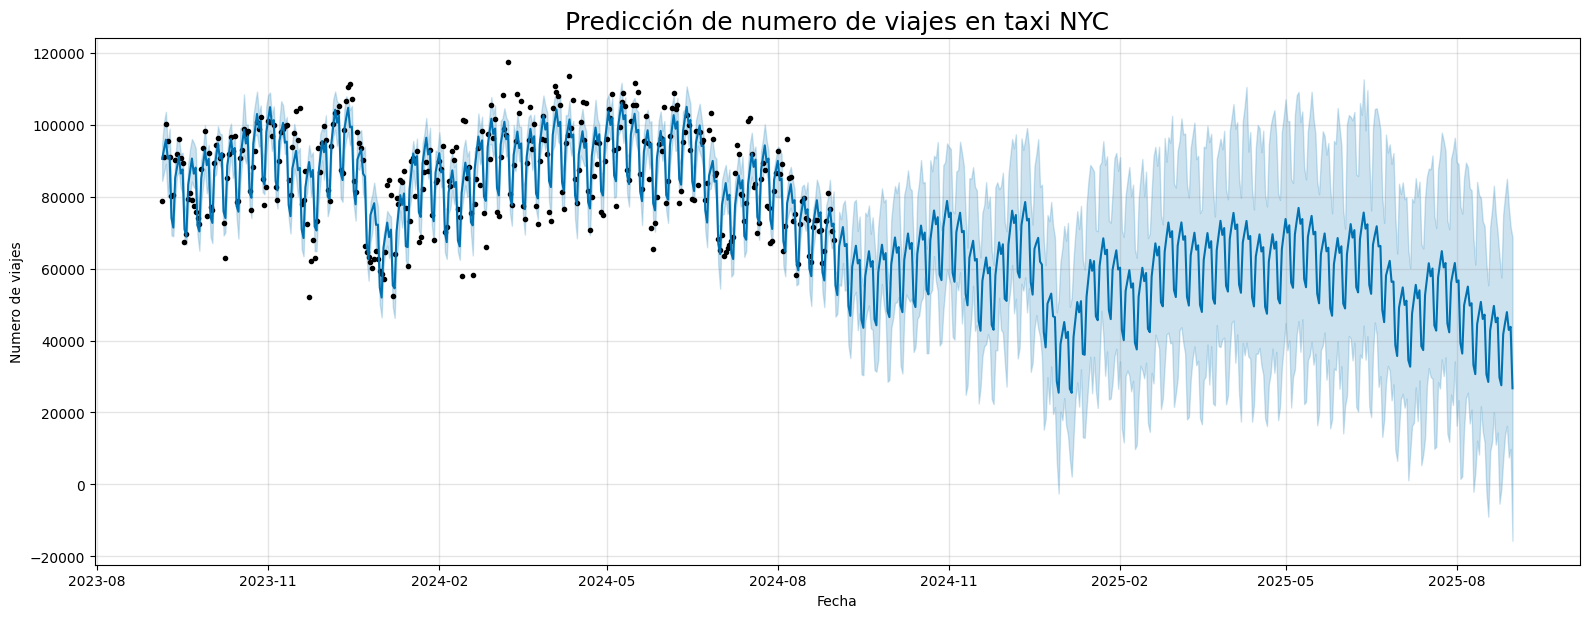

In [13]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

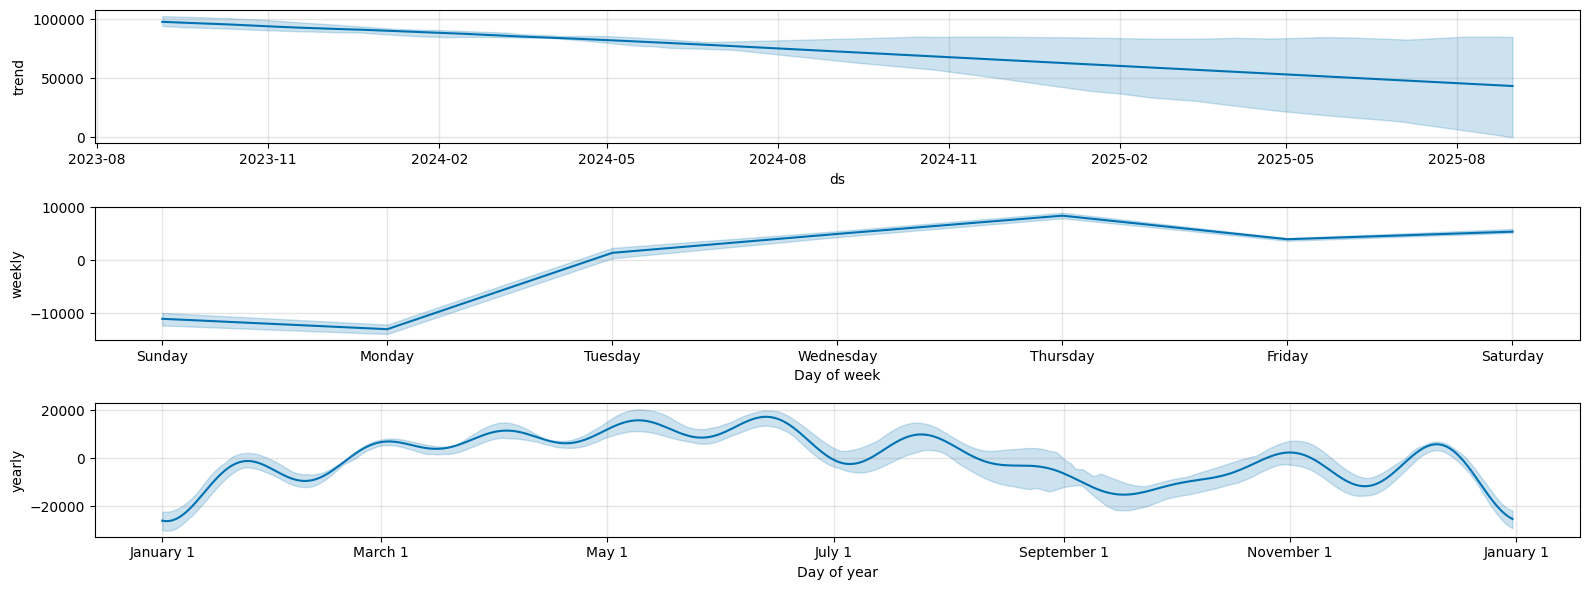

In [14]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Modelo 2

In [17]:
# Instanciamos un modelo de Prophet

prophet_2 = Prophet(
    daily_seasonality=True,    # Activar estacionalidad diaria
    yearly_seasonality=True,   # Mantener la estacionalidad anual
    weekly_seasonality=True,   # Activar la estacionalidad semanal si existen patrones semanales
    uncertainty_samples=80,
    mcmc_samples=80,# Ajustar el número de muestras para un mejor análisis de incertidumbre
    interval_width=0.6         # Intervalo de confianza del 80%
)

# Entrenamos el modelo
prophet_2.fit(diario_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 365 dias.
build_forecast = prophet_2.make_future_dataframe(periods=365, freq='D') #

# Predecimos
forecast_2 = prophet_2.predict(build_forecast)

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/4rf3u_qv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/nve_zvbk.json
21:41:14 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=14182', 'data', 'file=/tmp/tmp8ke_jo2c/4rf3u_qv.json', 'init=/tmp/tmp8ke_jo2c/nve_zvbk.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelqy_phu13/prophet_model-20241113214114_1.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=14182', 'data', 'file=/tmp/tmp8ke_jo2c/4rf3u_qv.json', 'init=/tmp/tmp8ke_jo2c/nve_zvbk.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelqy_phu13/prophet_model-20241113214114_2.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

21:41:29 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=14182', 'data', 'file=/tmp/tmp8ke_jo2c/4rf3u_qv.json', 'init=/tmp/tmp8ke_jo2c/nve_zvbk.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelqy_phu13/prophet_model-20241113214114_1.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8ke_jo2c/prophet_modelqy_phu13/prophet_model-20241113214114_1.csv
 console_msgs (if any):
	/tmp/tmp8ke_jo2c/prophet_modelqy_phu13/prophet_model-20241113214114_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 40
    num_warmup = 40
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [18]:
forecast_2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-05,286560.597686,82766.714555,97524.244131,111784.550313,442389.946880,-195591.146966,-351053.741191,-18750.581602,-186805.134686,...,316.949533,-359.465202,1010.433207,-9102.961813,-12812.721422,-5390.084952,0.0,0.0,0.0,90969.450720
1,2023-09-06,286480.595127,87629.725630,101436.220459,111832.369623,442260.742480,-191477.936600,-346069.452434,-16589.907734,-186805.134705,...,5364.417756,4651.322936,6062.160527,-10037.219652,-13768.316920,-5876.603240,0.0,0.0,0.0,95002.658526
2,2023-09-07,286400.592567,91577.121463,105701.714013,111880.188932,442131.538080,-189136.860927,-345480.898052,-12449.138417,-186805.134700,...,8640.769674,7790.133897,9556.532535,-10972.495901,-14866.372124,-6782.297169,0.0,0.0,0.0,97263.731640
3,2023-09-08,286320.590008,83718.997658,97361.257569,111722.822392,442002.333679,-194997.511166,-349022.119202,-19317.568931,-186805.134694,...,3699.855677,2906.425798,4614.342742,-11892.232149,-15900.868550,-7454.550210,0.0,0.0,0.0,91323.078842
4,2023-09-09,286240.587449,84481.625488,97435.962159,111505.690467,441873.129279,-193607.602749,-347413.080262,-18572.107976,-186805.134692,...,5977.570741,5063.526491,6933.755742,-12780.038797,-17034.799344,-8144.697280,0.0,0.0,0.0,92632.984701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,2025-08-27,233062.714718,25064.938448,72239.646368,66011.129144,378690.524957,-184583.167454,-340423.924800,-13091.500193,-186805.134680,...,5364.417756,4651.322936,6062.160527,-3142.450530,-6988.005435,1018.832138,0.0,0.0,0.0,48479.547264
723,2025-08-28,232990.097601,28988.282376,75307.306912,65964.766997,378597.883305,-181724.304296,-339081.433975,-9156.578471,-186805.134700,...,8640.769674,7790.133897,9556.532535,-3559.939270,-7604.879494,455.345305,0.0,0.0,0.0,51265.793305
724,2025-08-29,232917.480484,23052.939791,70788.724700,65918.404850,378495.132254,-187169.116760,-342517.560600,-14537.544110,-186805.134694,...,3699.855677,2906.425798,4614.342742,-4063.837743,-8151.267957,-170.346448,0.0,0.0,0.0,45748.363724
725,2025-08-30,232844.863367,22899.960347,74030.480233,65872.042703,378382.271805,-185480.421658,-341367.220599,-12324.144028,-186805.134692,...,5977.570741,5063.526491,6933.755742,-4652.857706,-8737.154989,-621.215888,0.0,0.0,0.0,47364.441709


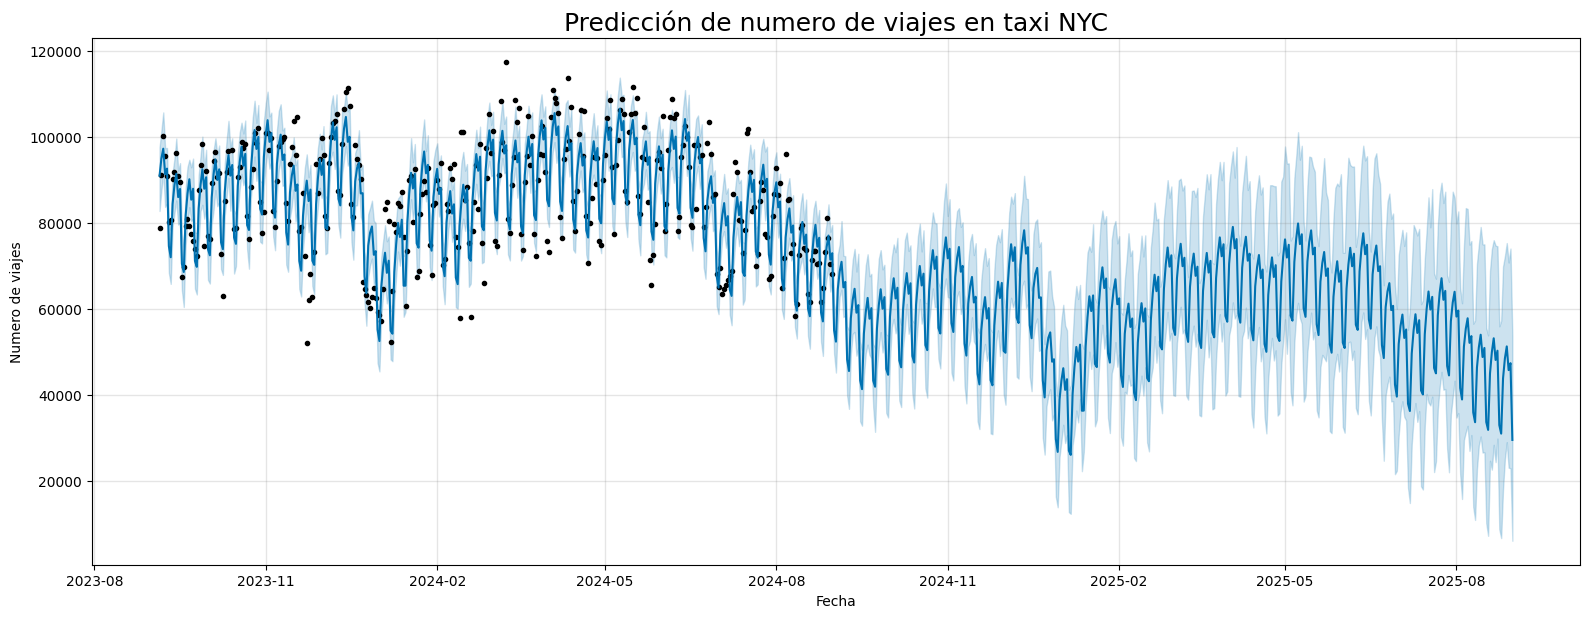

In [19]:
# plot forecasts

prophet_2.plot(forecast_2, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

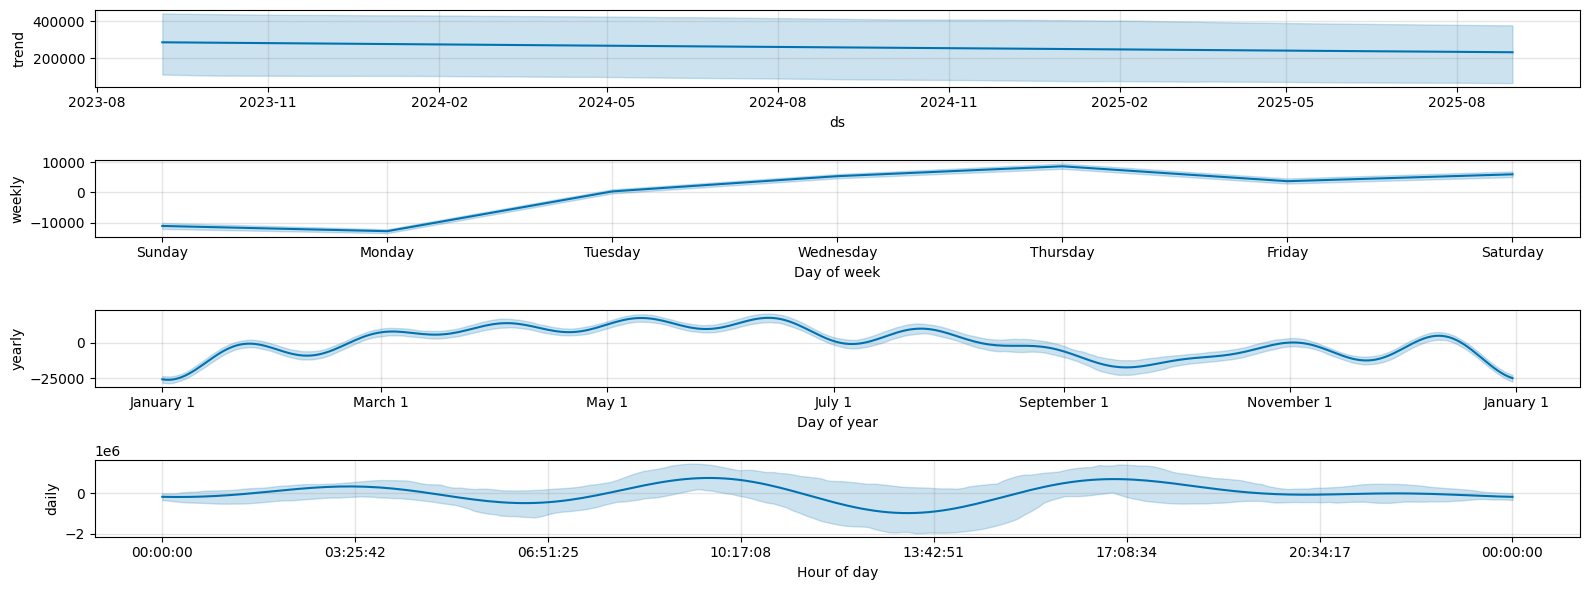

In [20]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_2.plot_components(forecast_2, figsize=(16,6))

# Evaluacion

In [21]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

### Modelo 1

In [22]:
df_cv_1 = cross_validation(prophet_1, initial = '120 days', horizon = '120 days')

INFO:prophet:Making 3 forecasts with cutoffs between 2024-01-04 00:00:00 and 2024-05-03 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/f56o5yaf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/j2mfb7f5.json
21:42:19 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=43080', 'data', 'file=/tmp/tmp8ke_jo2c/f56o5yaf.json', 'init=/tmp/tmp8ke_jo2c/j2mfb7f5.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelwsdh7z8p/prophet_model-20241113214219_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=43080', 'data', 'file=/tmp/tmp8ke_jo2c/f56o5yaf.json', 'init=/tmp/tmp8ke_jo2c/j2mfb7f5.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelwsdh7z8p/prophet_model-20241113214219_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

21:42:19 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=43080', 'data', 'file=/tmp/tmp8ke_jo2c/f56o5yaf.json', 'init=/tmp/tmp8ke_jo2c/j2mfb7f5.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelwsdh7z8p/prophet_model-20241113214219_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8ke_jo2c/prophet_modelwsdh7z8p/prophet_model-20241113214219_1.csv
 console_msgs (if any):
	/tmp/tmp8ke_jo2c/prophet_modelwsdh7z8p/prophet_model-20241113214219_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/r17an2cw.json
21:42:19 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8019', 'data', 'file=/tmp/tmp8ke_jo2c/v401ucvj.json', 'init=/tmp/tmp8ke_jo2c/r17an2cw.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model2uzbpyjv/prophet_model-20241113214220_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=8019', 'data', 'file=/tmp/tmp8ke_jo2c/v401ucvj.json', 'init=/tmp/tmp8ke_jo2c/r17an2cw.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model2uzbpyjv/prophet_model-20241113214220_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:

21:42:20 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=8019', 'data', 'file=/tmp/tmp8ke_jo2c/v401ucvj.json', 'init=/tmp/tmp8ke_jo2c/r17an2cw.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model2uzbpyjv/prophet_model-20241113214220_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8ke_jo2c/prophet_model2uzbpyjv/prophet_model-20241113214220_1.csv
 console_msgs (if any):
	/tmp/tmp8ke_jo2c/prophet_model2uzbpyjv/prophet_model-20241113214220_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)
 

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/hrq7pogt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/rqeczo3p.json
21:42:20 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=37949', 'data', 'file=/tmp/tmp8ke_jo2c/hrq7pogt.json', 'init=/tmp/tmp8ke_jo2c/rqeczo3p.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelo09_p963/prophet_model-20241113214220_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=37949', 'data', 'file=/tmp/tmp8ke_jo2c/hrq7pogt.json', 'init=/tmp/tmp8ke_jo2c/rqeczo3p.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelo09_p963/prophet_model-20241113214220_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

21:42:21 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=37949', 'data', 'file=/tmp/tmp8ke_jo2c/hrq7pogt.json', 'init=/tmp/tmp8ke_jo2c/rqeczo3p.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelo09_p963/prophet_model-20241113214220_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8ke_jo2c/prophet_modelo09_p963/prophet_model-20241113214220_1.csv
 console_msgs (if any):
	/tmp/tmp8ke_jo2c/prophet_modelo09_p963/prophet_model-20241113214220_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [23]:
df_cv_1


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-01-05,79382.038745,75218.612509,91047.267871,84757.0,2024-01-04
1,2024-01-06,84842.913809,63263.518613,99473.012057,80497.0,2024-01-04
2,2024-01-07,79484.520862,60083.038528,98119.934813,52261.0,2024-01-04
3,2024-01-08,86088.642865,59902.302727,112147.185516,64069.0,2024-01-04
4,2024-01-09,106080.016842,67331.344330,138541.019292,79631.0,2024-01-04
...,...,...,...,...,...,...
355,2024-08-27,79702.712582,46792.508482,124239.503736,73266.0,2024-05-03
356,2024-08-28,92318.806514,51957.819313,137496.114574,81088.0,2024-05-03
357,2024-08-29,103162.735940,70716.471539,132276.575562,76483.0,2024-05-03
358,2024-08-30,102399.938588,82933.066055,123755.746866,70549.0,2024-05-03


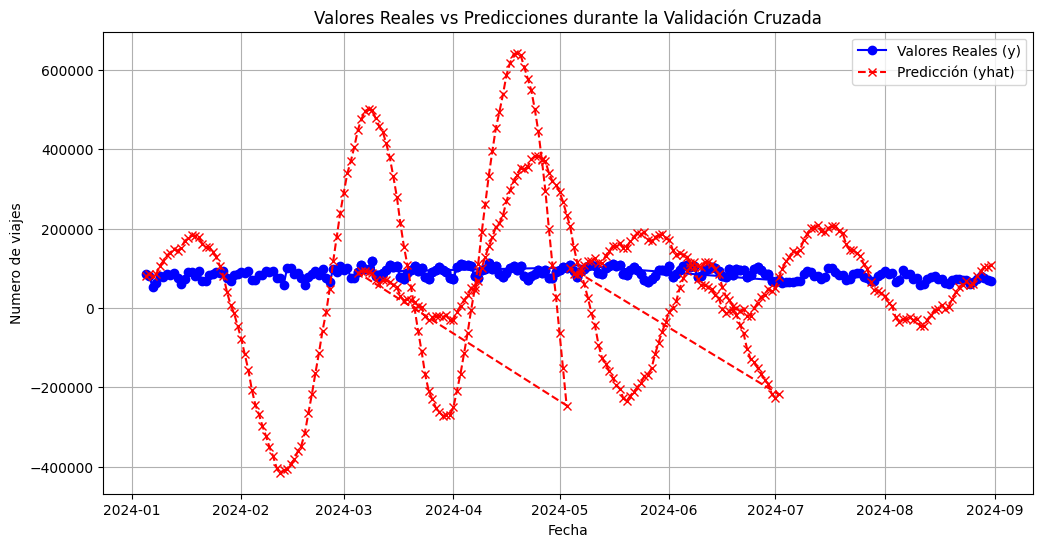

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_1['ds'], df_cv_1['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_1['ds'], df_cv_1['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
df_p_1 = performance_metrics(df_cv_1)
df_p_1.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,109,1.090000e+02,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,66 days 00:00:00,4.117288e+10,191618.967135,152144.762681,1.744174,1.323251,1.178747,0.808614
std,31 days 14:37:49.241158121,2.288167e+10,67054.476864,49724.226302,0.575955,0.472882,0.278181,0.144354
min,12 days 00:00:00,1.345334e+09,36678.791279,28247.462840,0.338880,0.256123,0.286944,0.388889
25%,39 days 00:00:00,2.335485e+10,152822.939047,116280.796556,1.337817,1.030346,1.043810,0.750000
50%,66 days 00:00:00,4.386612e+10,209442.395586,169381.083311,1.912971,1.247435,1.240949,0.833333
75%,93 days 00:00:00,5.292306e+10,230050.127967,185976.922054,2.142582,1.639042,1.363751,0.916667
max,120 days 00:00:00,8.389732e+10,289650.348356,224698.056872,2.706273,2.273030,1.619453,1.000000


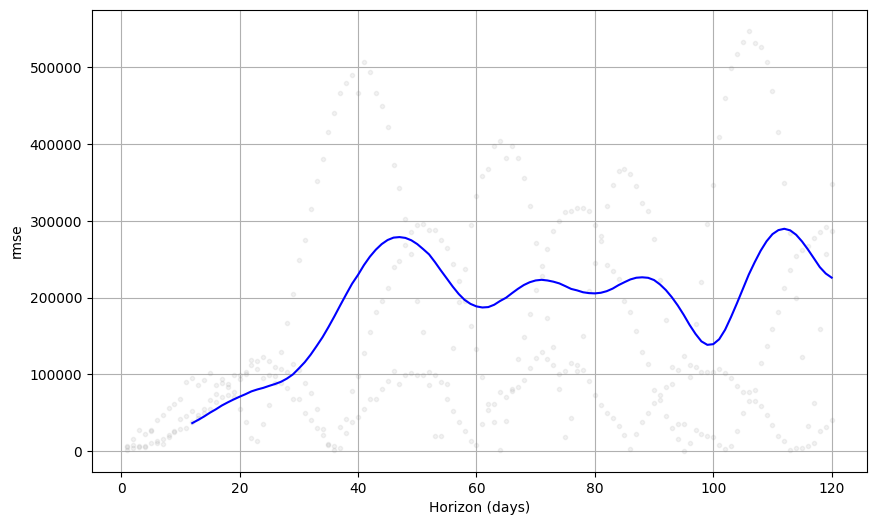

In [26]:
fig = plot_cross_validation_metric(df_cv_1, metric='rmse')

In [27]:
print('El RMSE es:', df_p_1.rmse.mean())

El RMSE es: 191618.96713510994


In [28]:
df_p_1 = performance_metrics(df_cv_1, rolling_window = 1)
df_p_1

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,120 days,3.942023e+10,198545.275153,146575.061969,1.684395,1.121194,1.135321,0.805556


### Modelo 2

In [29]:
df_cv_2 = cross_validation(prophet_2, initial = '120 days', horizon = '120 days')

INFO:prophet:Making 3 forecasts with cutoffs between 2024-01-04 00:00:00 and 2024-05-03 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/kqj_npl9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/canvf3lg.json
21:42:55 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=34259', 'data', 'file=/tmp/tmp8ke_jo2c/kqj_npl9.json', 'init=/tmp/tmp8ke_jo2c/canvf3lg.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelchhs4sqx/prophet_model-20241113214255_1.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=34259', 'data', 'file=/tmp/tmp8ke_jo2c/kqj_npl9.json', 'init=/tmp/tmp8ke_jo2c/canvf3lg.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelchhs4sqx/prophet_model-20241113214255_2.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

21:43:02 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=34259', 'data', 'file=/tmp/tmp8ke_jo2c/kqj_npl9.json', 'init=/tmp/tmp8ke_jo2c/canvf3lg.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelchhs4sqx/prophet_model-20241113214255_1.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8ke_jo2c/prophet_modelchhs4sqx/prophet_model-20241113214255_1.csv
 console_msgs (if any):
	/tmp/tmp8ke_jo2c/prophet_modelchhs4sqx/prophet_model-20241113214255_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 40
    num_warmup = 40
    save_warmup = 0 (Default)
    thin = 1 (Default)


DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/hard9gba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/6p15scqo.json
21:43:03 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=88299', 'data', 'file=/tmp/tmp8ke_jo2c/hard9gba.json', 'init=/tmp/tmp8ke_jo2c/6p15scqo.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelqump5l00/prophet_model-20241113214303_1.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=88299', 'data', 'file=/tmp/tmp8ke_jo2c/hard9gba.json', 'init=/tmp/tmp8ke_jo2c/6p15scqo.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelqump5l00/prophet_model-20241113214303_2.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

21:43:11 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=88299', 'data', 'file=/tmp/tmp8ke_jo2c/hard9gba.json', 'init=/tmp/tmp8ke_jo2c/6p15scqo.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_modelqump5l00/prophet_model-20241113214303_1.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8ke_jo2c/prophet_modelqump5l00/prophet_model-20241113214303_1.csv
 console_msgs (if any):
	/tmp/tmp8ke_jo2c/prophet_modelqump5l00/prophet_model-20241113214303_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 40
    num_warmup = 40
    save_warmup = 0 (Default)
    thin = 1 (Default)


DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/li9hmd4v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ke_jo2c/r5orkjts.json
21:43:12 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=96270', 'data', 'file=/tmp/tmp8ke_jo2c/li9hmd4v.json', 'init=/tmp/tmp8ke_jo2c/r5orkjts.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model_75brej1/prophet_model-20241113214312_1.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=96270', 'data', 'file=/tmp/tmp8ke_jo2c/li9hmd4v.json', 'init=/tmp/tmp8ke_jo2c/r5orkjts.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model_75brej1/prophet_model-20241113214312_2.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

21:43:23 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=96270', 'data', 'file=/tmp/tmp8ke_jo2c/li9hmd4v.json', 'init=/tmp/tmp8ke_jo2c/r5orkjts.json', 'output', 'file=/tmp/tmp8ke_jo2c/prophet_model_75brej1/prophet_model-20241113214312_1.csv', 'method=sample', 'num_samples=40', 'num_warmup=40', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp8ke_jo2c/prophet_model_75brej1/prophet_model-20241113214312_1.csv
 console_msgs (if any):
	/tmp/tmp8ke_jo2c/prophet_model_75brej1/prophet_model-20241113214312_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 40
    num_warmup = 40
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [30]:
df_cv_2


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-01-05,80754.465855,70642.570525,90043.929801,84757.0,2024-01-04
1,2024-01-06,86051.394363,73021.976743,97130.918303,80497.0,2024-01-04
2,2024-01-07,76036.398203,59479.037974,92378.857141,52261.0,2024-01-04
3,2024-01-08,78326.324928,50966.672036,102496.093310,64069.0,2024-01-04
4,2024-01-09,92311.129916,55237.050784,132564.481895,79631.0,2024-01-04
...,...,...,...,...,...,...
355,2024-08-27,-182888.218945,-550625.153245,250597.362521,73266.0,2024-05-03
356,2024-08-28,-158687.462114,-526138.701947,274775.304230,81088.0,2024-05-03
357,2024-08-29,-136670.732002,-503775.752756,299595.632001,76483.0,2024-05-03
358,2024-08-30,-125542.688474,-485359.975401,306249.282171,70549.0,2024-05-03


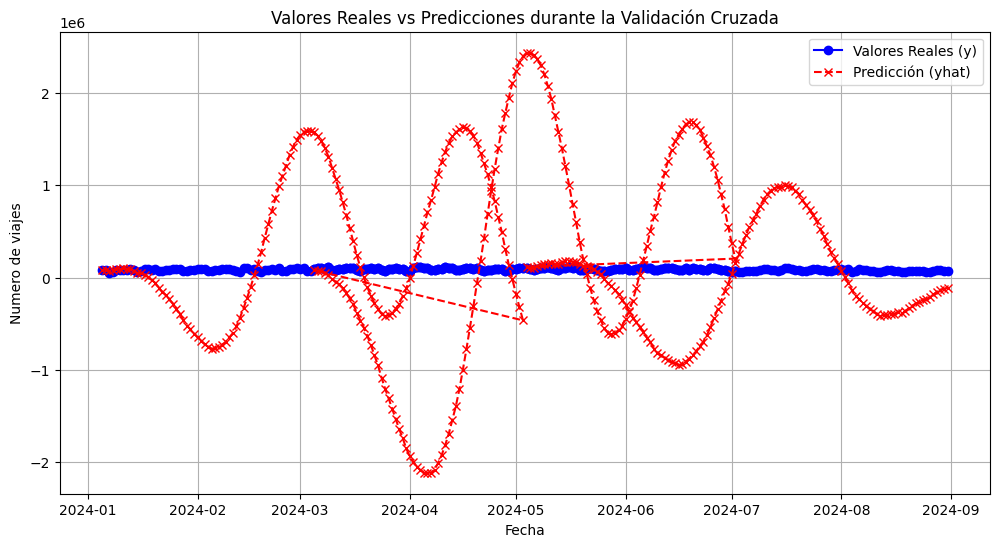

In [31]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_2['ds'], df_cv_2['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_2['ds'], df_cv_2['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
df_p_2 = performance_metrics(df_cv_2)
df_p_2.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,109,1.090000e+02,1.090000e+02,1.090000e+02,109.000000,109.000000,109.000000,109.000000
mean,66 days 00:00:00,9.477398e+11,9.036647e+05,7.656384e+05,8.583928,7.833970,1.674390,0.616208
std,31 days 14:37:49.241158121,6.374184e+11,3.637912e+05,3.312163e+05,3.614271,3.795323,0.260117,0.170823
min,12 days 00:00:00,1.332164e+10,1.154194e+05,6.852201e+04,0.713370,0.361074,0.637927,0.333333
25%,39 days 00:00:00,3.455601e+11,5.878436e+05,4.954231e+05,5.713783,5.123472,1.610807,0.472222
50%,66 days 00:00:00,8.582797e+11,9.264339e+05,7.966078e+05,8.935432,8.735074,1.727659,0.611111
75%,93 days 00:00:00,1.374136e+12,1.172236e+06,1.057328e+06,11.904431,9.989640,1.809202,0.722222
max,120 days 00:00:00,2.260859e+12,1.503615e+06,1.290314e+06,14.204424,14.648097,2.000000,0.972222


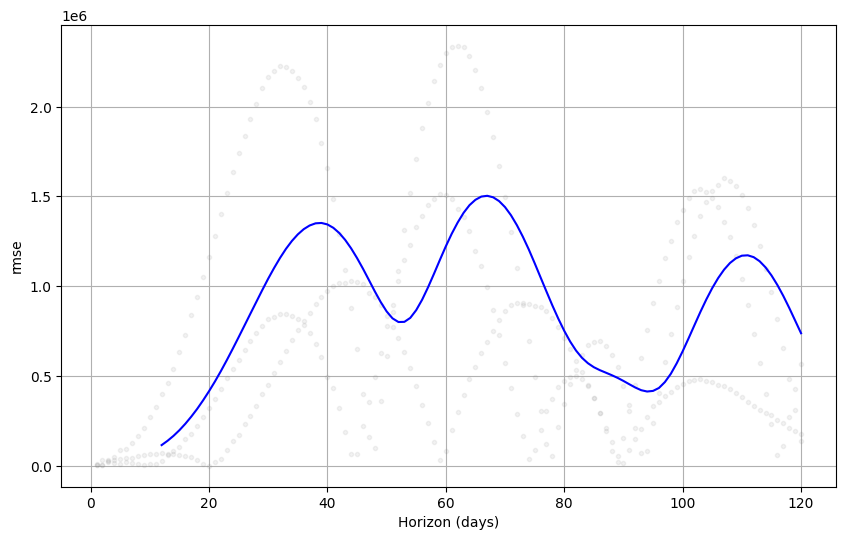

In [33]:
fig = plot_cross_validation_metric(df_cv_2, metric='rmse')

In [35]:
print('El RMSE es:', df_p_2.rmse.mean())

El RMSE es: 903664.7224533756


In [36]:
df_p_2 = performance_metrics(df_cv_2, rolling_window = 1)
df_p_2

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,120 days,8.744409e+11,935115.449646,717066.387181,8.051921,6.774291,1.621052,0.622222
